#Dependancies


In [1]:
pip install numpy==1.23.5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 60.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
chex 0.1.86 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
pandas-stubs 2.0.3.230814 requires numpy>=1.25.0; python_version >= "3.9", but you have numpy 1.23.5 which is incompatible.


In [1]:
!git clone https://github.com/ShreyAgarwal11/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding.git
%cd /content/
!git clone https://github.com/facebookresearch/av_hubert.git

%cd av_hubert
!git submodule init
!git submodule update
!pip install scipy
!pip install sentencepiece
!pip install python_speech_features
!pip install scikit-video

%cd fairseq
!pip install ./

Cloning into 'Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding'...
remote: Enumerating objects: 104830, done.
remote: Counting objects: 100% (1125/1125), done.
remote: Compressing objects: 100% (1047/1047), done.
remote: Total 104830 (delta 79), reused 1124 (delta 78), pack-reused 103705
Receiving objects: 100% (104830/104830), 3.10 GiB | 17.48 MiB/s, done.
Resolving deltas: 100% (92/92), done.
Updating files: 100% (104368/104368), done.
/content
fatal: destination path 'av_hubert' already exists and is not an empty directory.
/content/av_hubert
  Preparing metadata (setup.py) ... done
  Created wheel for python_speech_features: filename=python_speech_features-0.6-py3-none-any.whl size=5870 sha256=291f60e17f354a7522392f73e10c2051c46f5290d58b741e5a404ec0b808a4b2
  Stored in directory: /root/.cache/pip/wheels/5a/9e/68/30bad9462b3926c29e315df16b562216d12bdc215f4d240294
Successfully built python_speech_features
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB

In [2]:
!mkdir -p /content/data/misc/
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2 -O /content/data/misc/shape_predictor_68_face_landmarks.dat.bz2
!bzip2 -d /content/data/misc/shape_predictor_68_face_landmarks.dat.bz2
!wget --content-disposition https://github.com/mpc001/Lipreading_using_Temporal_Convolutional_Networks/raw/master/preprocessing/20words_mean_face.npy -O /content/data/misc/20words_mean_face.npy

--2024-04-24 18:53:44--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘/content/data/misc/shape_predictor_68_face_landmarks.dat.bz2’

/content/data/misc/ 100%[===================>]  61.07M  15.7MB/s    in 5.5s    

2024-04-24 18:53:50 (11.0 MB/s) - ‘/content/data/misc/shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]

--2024-04-24 18:54:04--  https://github.com/mpc001/Lipreading_using_Temporal_Convolutional_Networks/raw/master/preprocessing/20words_mean_face.npy
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mpc001/Lipreading_using_Temporal_Convolutional_Networks/master/preprocessing/20words_me

**Import a pre-trained model**


Fine tuned model -> Noise-Augmented AV-HuBERT Base


In [3]:
!pwd
%mkdir -p /content/data/
!wget https://dl.fbaipublicfiles.com/avhubert/model/lrs3_vox/avsr/base_noise_pt_noise_ft_433h.pt -O /content/data/finetune-model.pt

/content/av_hubert/fairseq
--2024-04-24 18:54:05--  https://dl.fbaipublicfiles.com/avhubert/model/lrs3_vox/avsr/base_noise_pt_noise_ft_433h.pt
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.227.219.10, 13.227.219.70, 13.227.219.33, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.227.219.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1928060481 (1.8G) [binary/octet-stream]
Saving to: ‘/content/data/finetune-model.pt’

/content/data/finet 100%[===================>]   1.79G   223MB/s    in 11s     

2024-04-24 18:54:15 (172 MB/s) - ‘/content/data/finetune-model.pt’ saved [1928060481/1928060481]



#Shrey's Video frame creation


In [ ]:
import cv2
import os
import numpy as np

frame_folder = "/content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/VidTIMIT/mwbt0/video/sa1"

output_video_path = "/content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/output_video.mp4"

frame_rate = 25

frame_files = [
    f for f in os.listdir(frame_folder) if os.path.isfile(os.path.join(frame_folder, f))
]

frame_files.sort()

video_resolution = (512, 384)

if video_resolution is None:
    first_frame_path = os.path.join(frame_folder, frame_files[0])
    first_frame = cv2.imread(first_frame_path)
    video_resolution = (first_frame.shape[1], first_frame.shape[0])


fourcc = cv2.VideoWriter_fourcc(*"MP4V")

out = cv2.VideoWriter(output_video_path, fourcc, frame_rate, video_resolution)

for frame_file in frame_files:
    frame_path = os.path.join(frame_folder, frame_file)
    frame = cv2.imread(frame_path)
    if (frame.shape[1], frame.shape[0]) != video_resolution:
        frame = cv2.resize(frame, video_resolution)
    out.write(frame)

out.release()

#Frame creation and Deepfake video segregation


Video from VidTIMIT that coincide with deepfake in folder comman_data


In [4]:
import cv2
import os
import shutil
import numpy as np

%mkdir -p /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/
%mkdir -p /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data_deep/

In [5]:
def create_output_video(frame_folder, frame_rate=25, video_resolution=(512, 384)):
    frame_files = [
        f
        for f in os.listdir(frame_folder)
        if os.path.isfile(os.path.join(frame_folder, f))
    ]
    frame_files.sort()

    if video_resolution is None:
        first_frame_path = os.path.join(frame_folder, frame_files[0])
        first_frame = cv2.imread(first_frame_path)
        video_resolution = (first_frame.shape[1], first_frame.shape[0])

    fourcc = cv2.VideoWriter_fourcc(*"MP4V")

    # Split the input path and extract the necessary components
    parts = frame_folder.split("/")
    speaker = parts[-3]  # Get the speaker ID (e.g., fadg0)
    video_name = parts[-1]  # Get the video name (e.g., sa1)

    # Define the output path
    output_video_path = os.path.join(
        "/content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/",
        f"{video_name}-video-{speaker}.mp4",
    )

    out = cv2.VideoWriter(output_video_path, fourcc, frame_rate, video_resolution)

    for frame_file in frame_files:
        frame_path = os.path.join(frame_folder, frame_file)
        frame = cv2.imread(frame_path)
        if (frame.shape[1], frame.shape[0]) != video_resolution:
            frame = cv2.resize(frame, video_resolution)
        out.write(frame)

    out.release()

In [6]:
folder1 = "/content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/DeepfakeTIMIT/higher_quality/"
folder2 = "/content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/VidTIMIT/"
output_vdtimit = "/content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/"


# Get list of files in each folder
files1 = os.listdir(folder1)
files2 = os.listdir(folder2)

# Extract filenames without extensions
file_names1 = [os.path.splitext(file)[0] for file in files1]
file_names2 = [os.path.splitext(file)[0] for file in files2]

# Find common filenames
common_file_names = set(file_names1).intersection(file_names2)

# Process files with common names
for common_name in common_file_names:

    check_folder = os.path.join(folder2, common_name)

    file_path2_audio = os.path.join(check_folder + "/audio")
    try:
        files2_in_audio = os.listdir(file_path2_audio)
        # print(files2_in_audio)
    except FileNotFoundError:
        # If directory does not exist, delete it and continue to the next directory
        shutil.rmtree(check_folder)
        print("Removed dir :", check_folder)
        continue

    file_path1 = os.path.join(folder1, common_name)
    file_path2 = os.path.join(folder2, common_name + "/video")
    files1_in = os.listdir(file_path1)
    files2_in = os.listdir(file_path2)

    # Extract filenames without extensions
    file_names1_in = [file.split("-")[0] for file in files1_in if "video" in file]
    # print(file_names1_in)
    file_names2_in = [file.split("-")[0] for file in files2_in]
    # print(file_names2_in)
    files2_audio_in = [file.split(".")[0] for file in files2_in_audio]
    # print(files2_audio_in)

    # # Find common filenames
    common_file_names_in = set(file_names1_in).intersection(file_names2_in)
    # print(common_file_names_in)
    common_audio_file = set(common_file_names_in).intersection(files2_audio_in)
    # print("Printed Audio -",common_audio_file)

    for filename in common_audio_file:
        # Rearrange the parts to get the desired filename
        new_filename_audio = filename + "-audio-" + common_name + ".wav"
        # print(new_filename_audio)
        file_path = os.path.join(output_vdtimit, new_filename_audio)
        # print("New file path -",file_path)
        shift_path = os.path.join(check_folder + "/audio/" + filename + ".wav")
        if os.path.exists(shift_path):
            # print("Shift_path -",shift_path)
            shutil.copy(shift_path, file_path)
            print(f"File copied successfully! '{file_path}'")
        else:
            print("Does not exits")

    for common_name_in in common_file_names_in:

        file_path1_in1 = os.path.join(file_path1, common_name_in)
        file_path2_in2 = os.path.join(file_path2, common_name_in)
        create_output_video(file_path2_in2)

        # Check if both files exist before proceeding

        if os.path.exists(file_path2_in2):
            # Do something with the files, such as processing or using them in your code
            print(f"Files with name '{common_name_in}' exist in both folders:")
            # print(f"File path in folder1: {file_path1_in1}")
            # print(f"File path in folder2: {file_path2_in2}")
            # Your code to process or use the files goes here
        else:
            print(f"Files with name '{common_name_in}' do not exist in both folders.")
            print(f"File path in folder1: {file_path1_in1}")
            print(f"File path in folder2: {file_path2_in2}")

File copied successfully! '/content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-audio-mccs0.wav'
File copied successfully! '/content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx29-audio-mccs0.wav'
File copied successfully! '/content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx299-audio-mccs0.wav'
File copied successfully! '/content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1469-audio-mccs0.wav'
File copied successfully! '/content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si839-audio-mccs0.wav'
File copied successfully! '/content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa2-audio-mccs0.wav'
File copied successfully! '/content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si2099-audio-mccs0.wav'
Fi

Video from DeepfakeTIMIT that coincide with VidTIMIT in folder comman_data_deep


In [7]:
frame_folder = "/content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/DeepfakeTIMIT/higher_quality/"
output_video_path = "/content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data_deep/"

# Get list of directories in the frame_folder
directories = [
    os.path.join(frame_folder, name)
    for name in os.listdir(frame_folder)
    if os.path.isdir(os.path.join(frame_folder, name))
]

# Process files in each directory
for directory in directories:
    # Get list of files in each directory
    files_in_directory = os.listdir(directory)
    # print("directory -", directory)
    intial = directory.split("/")
    speaker = intial[-1]
    # print(intial[-1])

    # Process each file
    for filename in files_in_directory:

        if filename.startswith("."):
            continue

        if "video" not in filename:
            # print(filename)
            file_path_audio = os.path.join(directory, filename)
            # print(file_path)
            name, ext = os.path.splitext(filename)
            # print(name)

            # Rearrange the parts to get the desired filename
            new_filename_audio = name + "-audio-" + speaker + ext
            # print(new_filename_audio)

            # Construct the new path
            new_path_audio = os.path.join(output_video_path, new_filename_audio)
            print(new_path_audio)

            # Copy the file to the new path
            shutil.copy(file_path_audio, new_path_audio)

            print(f"File copied successfully! '{new_path_audio}'")

        if "video" in filename:
            # print(filename)
            file_path = os.path.join(directory, filename)
            # print(file_path)
            name, ext = os.path.splitext(filename)
            # print(name)

            # Split the name into parts separated by '-'
            parts = name.split("-")
            # print("Parts -",parts)

            # Rearrange the parts to get the desired filename
            new_filename = parts[0] + "-video-" + speaker + ext
            # print(new_filename)

            # Construct the new path
            new_path = os.path.join(output_video_path, new_filename)
            print(new_path)

            # Copy the file to the new path
            shutil.copy(file_path, new_path)

            print(f"File copied successfully! '{new_path}'")

/content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data_deep/si913-video-mdld0.avi
File copied successfully! '/content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data_deep/si913-video-mdld0.avi'
/content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data_deep/sa1-audio-mdld0.wav
File copied successfully! '/content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data_deep/sa1-audio-mdld0.wav'
/content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data_deep/sx193-video-mdld0.avi
File copied successfully! '/content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data_deep/sx193-video-mdld0.avi'
/content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data_deep/sx193-audio-mdld0.wav
File copied successfully! '/content/Privacy-Preserving-Representation-for-Audio-

#AVHubert functions


In [8]:
%cd /content/av_hubert/avhubert
import cv2
import tempfile
import torch
import utils as avhubert_utils
from argparse import Namespace
import fairseq
from fairseq import checkpoint_utils, options, tasks, utils
from IPython.display import HTML
from python_speech_features import logfbank
from scipy.io import wavfile

/content/av_hubert/avhubert


**Feature Extraction using AV-HUBERT**


In [9]:
def stacker(feats, stack_order):
    """
    Concatenating consecutive audio frames
    Args:
    feats - numpy.ndarray of shape [T, F]
    stack_order - int (number of neighboring frames to concatenate
    Returns:
    feats - numpy.ndarray of shape [T', F']
    """
    feat_dim = feats.shape[1]
    if len(feats) % stack_order != 0:
        res = stack_order - len(feats) % stack_order
        res = np.zeros([res, feat_dim]).astype(feats.dtype)
        feats = np.concatenate([feats, res], axis=0)
    feats = feats.reshape((-1, stack_order, feat_dim)).reshape(
        -1, stack_order * feat_dim
    )
    return feats

In [10]:
def extract_visual_feature(
    video_path, audio_path, ckpt_path, user_dir, is_finetune_ckpt=False
):

    utils.import_user_module(Namespace(user_dir=user_dir))

    models, saved_cfg, task = checkpoint_utils.load_model_ensemble_and_task([ckpt_path])

    transform = avhubert_utils.Compose(
        [

            avhubert_utils.Normalize(0.0, 255.0),

            avhubert_utils.CenterCrop(
                (task.cfg.image_crop_size, task.cfg.image_crop_size)
            ),

            avhubert_utils.Normalize(task.cfg.image_mean, task.cfg.image_std),
        ]
    )

    frames = avhubert_utils.load_video(video_path)

    print(f"Load video {video_path}: shape {frames.shape}")

    sample_rate, wav_data = wavfile.read(audio_path)

    audio_features = logfbank(wav_data, sample_rate).astype(np.float32)

    audio_features = stacker(audio_features, 4)

    print(f"Load audio {audio_path}: shape {audio_features.shape}")

    audio_features = (
        torch.FloatTensor(audio_features).unsqueeze(dim=0).permute(0, 2, 1).cuda()

    )
    frames = torch.FloatTensor(frames).unsqueeze(dim=0).unsqueeze(dim=0).cuda()

    if audio_features.shape[2] < frames.shape[2]:

        # Pad features_audio

        padding_size = frames.shape[2] - audio_features.shape[2]

        padding = torch.zeros(
            (audio_features.shape[0], audio_features.shape[1], padding_size)
        ).cuda()

        audio_features = torch.cat([audio_features, padding], dim=2)

    print(f"Load video {video_path}: shape {frames.shape}")

    print(f"Load audio {audio_path}: shape {audio_features.shape}")

    model = models[0]

    if hasattr(models[0], "decoder"):

        print(f"Checkpoint: fine-tuned")

        model = models[0].encoder.w2v_model

    else:

        print(f"Checkpoint: pre-trained w/o fine-tuning")
    model.cuda()

    model.eval()

    with torch.no_grad():

        # Specify output_layer if you want to extract feature of an intermediate layer

        layer_features = []

        for i in range(12):

            feature, _ = model.extract_finetune(
                source={"video": frames, "audio": audio_features},
                padding_mask=None,
                output_layer=(i + 1),
            )

            layer_features.append(feature)

        feature, _ = model.extract_finetune(
            source={"video": frames, "audio": audio_features},
            padding_mask=None,
            output_layer=None,
        )

        feature = feature.squeeze(dim=0)

    print(f"AvHuBert Feature shape: {feature.shape}")

    return layer_features, feature

In [11]:
folder_path_real = "/content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/"
folder_path_deep = "/content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data_deep/"

# Initialize an empty list to store pairs of file paths
real_file_pairs = []
deep_file_pairs = []

# Get the list of files in the real folder
files_real = os.listdir(folder_path_real)

# Get the list of files in the deep folder
files_deep = os.listdir(folder_path_deep)

# Iterate over each file in the real folder
for file_real in files_real:
    # Split the filename and extension
    name, ext_real = os.path.splitext(file_real)
    # print(file_real)

    # Check if the file is an audio file
    if ext_real == ".wav":
        # Construct the expected video filename
        audio_filename_real = name
        video_filename_real = name.replace("-audio-", "-video-")
        # print(video_filename)

        # Check if the video file exists in the deep folder
        for file_deep in files_deep:
            name_deep, ext_deep = os.path.splitext(file_deep)
            # print(name_deep)
            # Check if the file is an audio file
            if ext_deep == ".wav":
                # Construct the expected video filename
                audio_filename_deep = name_deep
                video_filename_deep = name_deep.replace("-audio-", "-video-")
                if video_filename_deep == video_filename_real:
                    # Construct the paths for the audio and video files in both folders
                    audio_path_real = os.path.join(
                        folder_path_real, audio_filename_real + ext_deep
                    )
                    # print(audio_path_real)
                    video_path_real = os.path.join(
                        folder_path_real, video_filename_real + ".mp4"
                    )
                    audio_path_deep = os.path.join(
                        folder_path_deep, audio_filename_deep + ext_deep
                    )
                    # print(audio_path_deep)
                    video_path_deep = os.path.join(
                        folder_path_deep, video_filename_real + ".avi"
                    )

                    # Check if both audio and video files exist in both folders
                    if (
                        os.path.exists(audio_path_real)
                        and os.path.exists(video_path_real)
                        and os.path.exists(audio_path_deep)
                        and os.path.exists(video_path_deep)
                    ):
                        # Add the pair of paths to the list
                        real_file_pairs.append((audio_path_real, video_path_real))
                        deep_file_pairs.append((audio_path_deep, video_path_deep))

# Print the number of file pairs found
print(len(os.listdir(folder_path_real)))
print(len(os.listdir(folder_path_deep)))
print(len(real_file_pairs))
print(len(deep_file_pairs))

580
640
290
290


In [12]:
ckpt_path = "/content/data/finetune-model.pt"
user_dir = "/content/av_hubert/avhubert"

feature_real = {}
feature_deep = {}

# Counter variables to keep track of iterations
count_real = 0
count_deep = 0

# Loop over real_file_pairs
for pair in real_file_pairs:
    # Increment the counter
    count_real += 1

    audio_path = pair[0]
    mouth_roi_path = pair[1]
    name_r, ext_r = os.path.splitext(pair[0])
    index_data_r = name_r.split("/")[-1].replace("-audio-", "")

    # Check if the index is not already in feature_real
    if index_data_r not in feature_real:
        layer_features, feature_real[index_data_r] = extract_visual_feature(
            mouth_roi_path, audio_path, ckpt_path, user_dir
        )

    # # Break after every 5 iterations
    if count_real == 128:
        break

# Loop over deep_file_pairs
for pair in deep_file_pairs:
    # Increment the counter
    count_deep += 1

    audio_path = pair[0]
    mouth_roi_path = pair[1]
    name_d, ext_d = os.path.splitext(pair[0])
    index_data_d = name_d.split("/")[-1].replace("-audio-", "")

    # Check if the index is not already in feature_deep
    if index_data_d not in feature_deep:
        layer_features, feature_deep[index_data_d] = extract_visual_feature(
            mouth_roi_path, audio_path, ckpt_path, user_dir
        )

    # Break after every 5 iterations
    if count_deep == 128:
        break

/usr/local/lib/python3.10/dist-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1364-video-mrjo0.mp4: shape (138, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1364-audio-mrjo0.wav: shape (138, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1364-video-mrjo0.mp4: shape torch.Size([1, 1, 138, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1364-audio-mrjo0.wav: shape torch.Size([1, 104, 138])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([138, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si844-video-fdac1.mp4: shape (137, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si844-audio-fdac1.wav: shape (137, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si844-video-fdac1.mp4: shape torch.Size([1, 1, 137, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si844-audio-fdac1.wav: shape torch.Size([1, 104, 137])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([137, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1360-video-fram1.mp4: shape (114, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1360-audio-fram1.wav: shape (114, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1360-video-fram1.mp4: shape torch.Size([1, 1, 114, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1360-audio-fram1.wav: shape torch.Size([1, 104, 114])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([114, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx320-video-fkms0.mp4: shape (102, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx320-audio-fkms0.wav: shape (102, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx320-video-fkms0.mp4: shape torch.Size([1, 1, 102, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx320-audio-fkms0.wav: shape torch.Size([1, 104, 102])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([102, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx189-video-msjs1.mp4: shape (110, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx189-audio-msjs1.wav: shape (110, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx189-video-msjs1.mp4: shape torch.Size([1, 1, 110, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx189-audio-msjs1.wav: shape torch.Size([1, 104, 110])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([110, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx216-video-fjre0.mp4: shape (82, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx216-audio-fjre0.wav: shape (82, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx216-video-fjre0.mp4: shape torch.Size([1, 1, 82, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx216-audio-fjre0.wav: shape torch.Size([1, 104, 82])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([82, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-video-mwbt0.mp4: shape (104, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-audio-mwbt0.wav: shape (104, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-video-mwbt0.mp4: shape torch.Size([1, 1, 104, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-audio-mwbt0.wav: shape torch.Size([1, 104, 104])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([104, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa2-video-fjas0.mp4: shape (83, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa2-audio-fjas0.wav: shape (83, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa2-video-fjas0.mp4: shape torch.Size([1, 1, 83, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa2-audio-fjas0.wav: shape torch.Size([1, 104, 83])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([83, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1265-video-fjwb0.mp4: shape (123, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1265-audio-fjwb0.wav: shape (123, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1265-video-fjwb0.mp4: shape torch.Size([1, 1, 123, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1265-audio-fjwb0.wav: shape torch.Size([1, 104, 123])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([123, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx289-video-mpgl0.mp4: shape (98, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx289-audio-mpgl0.wav: shape (98, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx289-video-mpgl0.mp4: shape torch.Size([1, 1, 98, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx289-audio-mpgl0.wav: shape torch.Size([1, 104, 98])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([98, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1099-video-mpgl0.mp4: shape (72, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1099-audio-mpgl0.wav: shape (72, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1099-video-mpgl0.mp4: shape torch.Size([1, 1, 72, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1099-audio-mpgl0.wav: shape torch.Size([1, 104, 72])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([72, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-video-fedw0.mp4: shape (92, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-audio-fedw0.wav: shape (92, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-video-fedw0.mp4: shape torch.Size([1, 1, 92, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-audio-fedw0.wav: shape torch.Size([1, 104, 92])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([92, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx306-video-felc0.mp4: shape (80, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx306-audio-felc0.wav: shape (80, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx306-video-felc0.mp4: shape torch.Size([1, 1, 80, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx306-audio-felc0.wav: shape torch.Size([1, 104, 80])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([80, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx223-video-faks0.mp4: shape (89, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx223-audio-faks0.wav: shape (89, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx223-video-faks0.mp4: shape torch.Size([1, 1, 89, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx223-audio-faks0.wav: shape torch.Size([1, 104, 89])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([89, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa2-video-fjwb0.mp4: shape (99, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa2-audio-fjwb0.wav: shape (99, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa2-video-fjwb0.mp4: shape torch.Size([1, 1, 99, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa2-audio-fjwb0.wav: shape torch.Size([1, 104, 99])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([99, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx200-video-mjsw0.mp4: shape (90, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx200-audio-mjsw0.wav: shape (90, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx200-video-mjsw0.mp4: shape torch.Size([1, 1, 90, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx200-audio-mjsw0.wav: shape torch.Size([1, 104, 90])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([90, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx23-video-mwbt0.mp4: shape (101, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx23-audio-mwbt0.wav: shape (101, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx23-video-mwbt0.mp4: shape torch.Size([1, 1, 101, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx23-audio-mwbt0.wav: shape torch.Size([1, 104, 101])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([101, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa2-video-mstk0.mp4: shape (87, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa2-audio-mstk0.wav: shape (87, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa2-video-mstk0.mp4: shape torch.Size([1, 1, 87, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa2-audio-mstk0.wav: shape torch.Size([1, 104, 87])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([87, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1116-video-fjre0.mp4: shape (85, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1116-audio-fjre0.wav: shape (85, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1116-video-fjre0.mp4: shape torch.Size([1, 1, 85, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1116-audio-fjre0.wav: shape torch.Size([1, 104, 85])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([85, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx9-video-mgwt0.mp4: shape (80, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx9-audio-mgwt0.wav: shape (80, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx9-video-mgwt0.mp4: shape torch.Size([1, 1, 80, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx9-audio-mgwt0.wav: shape torch.Size([1, 104, 80])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([80, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx104-video-mrjo0.mp4: shape (86, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx104-audio-mrjo0.wav: shape (86, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx104-video-mrjo0.mp4: shape torch.Size([1, 1, 86, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx104-audio-mrjo0.wav: shape torch.Size([1, 104, 86])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([86, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si2169-video-mgwt0.mp4: shape (136, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si2169-audio-mgwt0.wav: shape (136, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si2169-video-mgwt0.mp4: shape torch.Size([1, 1, 136, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si2169-audio-mgwt0.wav: shape torch.Size([1, 104, 136])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([136, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1553-video-mwbt0.mp4: shape (150, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1553-audio-mwbt0.wav: shape (150, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1553-video-mwbt0.mp4: shape torch.Size([1, 1, 150, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1553-audio-mwbt0.wav: shape torch.Size([1, 104, 150])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([150, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa2-video-msjs1.mp4: shape (121, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa2-audio-msjs1.wav: shape (121, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa2-video-msjs1.mp4: shape torch.Size([1, 1, 121, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa2-audio-msjs1.wav: shape torch.Size([1, 104, 121])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([121, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx230-video-fkms0.mp4: shape (115, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx230-audio-fkms0.wav: shape (115, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx230-video-fkms0.mp4: shape torch.Size([1, 1, 115, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx230-audio-fkms0.wav: shape torch.Size([1, 104, 115])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([115, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1474-video-fdac1.mp4: shape (88, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1474-audio-fdac1.wav: shape (88, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1474-video-fdac1.mp4: shape torch.Size([1, 1, 88, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1474-audio-fdac1.wav: shape torch.Size([1, 104, 88])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([88, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-video-mgwt0.mp4: shape (125, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-audio-mgwt0.wav: shape (125, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-video-mgwt0.mp4: shape torch.Size([1, 1, 125, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-audio-mgwt0.wav: shape torch.Size([1, 104, 125])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([125, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx140-video-fkms0.mp4: shape (109, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx140-audio-fkms0.wav: shape (109, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx140-video-fkms0.mp4: shape torch.Size([1, 1, 109, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx140-audio-fkms0.wav: shape torch.Size([1, 104, 109])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([109, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx109-video-mpgl0.mp4: shape (110, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx109-audio-mpgl0.wav: shape (110, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx109-video-mpgl0.mp4: shape torch.Size([1, 1, 110, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx109-audio-mpgl0.wav: shape torch.Size([1, 104, 110])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([110, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-video-fram1.mp4: shape (117, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-audio-fram1.wav: shape (117, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-video-fram1.mp4: shape torch.Size([1, 1, 117, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-audio-fram1.wav: shape torch.Size([1, 104, 117])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([117, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1544-video-fdrd1.mp4: shape (87, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1544-audio-fdrd1.wav: shape (87, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1544-video-fdrd1.mp4: shape torch.Size([1, 1, 87, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1544-audio-fdrd1.wav: shape torch.Size([1, 104, 87])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([87, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx281-video-mrcz0.mp4: shape (115, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx281-audio-mrcz0.wav: shape (115, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx281-video-mrcz0.mp4: shape torch.Size([1, 1, 115, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx281-audio-mrcz0.wav: shape torch.Size([1, 104, 115])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([115, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx102-video-mmdm2.mp4: shape (116, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx102-audio-mmdm2.wav: shape (116, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx102-video-mmdm2.mp4: shape torch.Size([1, 1, 116, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx102-audio-mmdm2.wav: shape torch.Size([1, 104, 116])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([116, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx185-video-mmdb1.mp4: shape (97, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx185-audio-mmdb1.wav: shape (97, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx185-video-mmdb1.mp4: shape torch.Size([1, 1, 97, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx185-audio-mmdb1.wav: shape torch.Size([1, 104, 97])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([97, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx184-video-fjem0.mp4: shape (155, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx184-audio-fjem0.wav: shape (155, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx184-video-fjem0.mp4: shape torch.Size([1, 1, 155, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx184-audio-fjem0.wav: shape torch.Size([1, 104, 155])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([155, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx365-video-mmdb1.mp4: shape (128, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx365-audio-mmdb1.wav: shape (128, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx365-video-mmdb1.mp4: shape torch.Size([1, 1, 128, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx365-audio-mmdb1.wav: shape torch.Size([1, 104, 128])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([128, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-video-fdac1.mp4: shape (95, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-audio-fdac1.wav: shape (95, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-video-fdac1.mp4: shape torch.Size([1, 1, 95, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-audio-fdac1.wav: shape torch.Size([1, 104, 95])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([95, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-video-mjar0.mp4: shape (150, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-audio-mjar0.wav: shape (150, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-video-mjar0.mp4: shape torch.Size([1, 1, 150, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-audio-mjar0.wav: shape torch.Size([1, 104, 150])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([150, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-video-faks0.mp4: shape (89, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-audio-faks0.wav: shape (89, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-video-faks0.mp4: shape torch.Size([1, 1, 89, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-audio-faks0.wav: shape torch.Size([1, 104, 89])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([89, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx110-video-mjsw0.mp4: shape (83, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx110-audio-mjsw0.wav: shape (83, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx110-video-mjsw0.mp4: shape torch.Size([1, 1, 83, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx110-audio-mjsw0.wav: shape torch.Size([1, 104, 83])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([83, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa2-video-faks0.mp4: shape (81, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa2-audio-faks0.wav: shape (81, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa2-video-faks0.mp4: shape torch.Size([1, 1, 81, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa2-audio-faks0.wav: shape torch.Size([1, 104, 81])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([81, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si992-video-fjwb0.mp4: shape (182, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si992-audio-fjwb0.wav: shape (182, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si992-video-fjwb0.mp4: shape torch.Size([1, 1, 182, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si992-audio-fjwb0.wav: shape torch.Size([1, 104, 182])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([182, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx280-video-fram1.mp4: shape (85, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx280-audio-fram1.wav: shape (85, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx280-video-fram1.mp4: shape torch.Size([1, 1, 85, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx280-audio-fram1.wav: shape torch.Size([1, 104, 85])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([85, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si2120-video-fkms0.mp4: shape (106, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si2120-audio-fkms0.wav: shape (106, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si2120-video-fkms0.mp4: shape torch.Size([1, 1, 106, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si2120-audio-fkms0.wav: shape torch.Size([1, 104, 106])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([106, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1808-video-fcft0.mp4: shape (112, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1808-audio-fcft0.wav: shape (112, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1808-video-fcft0.mp4: shape torch.Size([1, 1, 112, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1808-audio-fcft0.wav: shape torch.Size([1, 104, 112])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([112, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1178-video-fcft0.mp4: shape (136, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1178-audio-fcft0.wav: shape (136, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1178-video-fcft0.mp4: shape torch.Size([1, 1, 136, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1178-audio-fcft0.wav: shape torch.Size([1, 104, 136])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([136, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-video-mdab0.mp4: shape (149, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-audio-mdab0.wav: shape (149, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-video-mdab0.mp4: shape torch.Size([1, 1, 149, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-audio-mdab0.wav: shape torch.Size([1, 104, 149])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([149, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-video-mstk0.mp4: shape (93, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-audio-mstk0.wav: shape (93, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-video-mstk0.mp4: shape torch.Size([1, 1, 93, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-audio-mstk0.wav: shape torch.Size([1, 104, 93])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([93, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si2284-video-mstk0.mp4: shape (69, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si2284-audio-mstk0.wav: shape (69, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si2284-video-mstk0.mp4: shape torch.Size([1, 1, 69, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si2284-audio-mstk0.wav: shape torch.Size([1, 104, 69])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([69, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx50-video-fkms0.mp4: shape (109, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx50-audio-fkms0.wav: shape (109, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx50-video-fkms0.mp4: shape torch.Size([1, 1, 109, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx50-audio-fkms0.wav: shape torch.Size([1, 104, 109])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([109, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa2-video-mpdf0.mp4: shape (96, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa2-audio-mpdf0.wav: shape (96, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa2-video-mpdf0.mp4: shape torch.Size([1, 1, 96, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa2-audio-mpdf0.wav: shape torch.Size([1, 104, 96])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([96, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx304-video-mstk0.mp4: shape (94, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx304-audio-mstk0.wav: shape (94, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx304-video-mstk0.mp4: shape torch.Size([1, 1, 94, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx304-audio-mstk0.wav: shape torch.Size([1, 104, 94])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([94, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si770-video-fjas0.mp4: shape (143, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si770-audio-fjas0.wav: shape (143, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si770-video-fjas0.mp4: shape torch.Size([1, 1, 143, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si770-audio-fjas0.wav: shape torch.Size([1, 104, 143])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([143, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-video-mjsw0.mp4: shape (94, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-audio-mjsw0.wav: shape (94, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-video-mjsw0.mp4: shape torch.Size([1, 1, 94, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-audio-mjsw0.wav: shape torch.Size([1, 104, 94])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([94, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1010-video-mjsw0.mp4: shape (138, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1010-audio-mjsw0.wav: shape (138, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1010-video-mjsw0.mp4: shape torch.Size([1, 1, 138, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1010-audio-mjsw0.wav: shape torch.Size([1, 104, 138])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([138, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si2149-video-fdrd1.mp4: shape (152, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si2149-audio-fdrd1.wav: shape (152, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si2149-video-fdrd1.mp4: shape torch.Size([1, 1, 152, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si2149-audio-fdrd1.wav: shape torch.Size([1, 104, 152])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([152, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx228-video-mcem0.mp4: shape (70, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx228-audio-mcem0.wav: shape (70, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx228-video-mcem0.mp4: shape torch.Size([1, 1, 70, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx228-audio-mcem0.wav: shape torch.Size([1, 104, 70])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([70, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx379-video-mpgl0.mp4: shape (91, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx379-audio-mpgl0.wav: shape (91, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx379-video-mpgl0.mp4: shape torch.Size([1, 1, 91, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx379-audio-mpgl0.wav: shape torch.Size([1, 104, 91])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([91, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx184-video-fedw0.mp4: shape (79, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx184-audio-fedw0.wav: shape (79, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx184-video-fedw0.mp4: shape torch.Size([1, 1, 79, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx184-audio-fedw0.wav: shape torch.Size([1, 104, 79])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([79, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa2-video-mgwt0.mp4: shape (84, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa2-audio-mgwt0.wav: shape (84, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa2-video-mgwt0.mp4: shape torch.Size([1, 1, 84, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa2-audio-mgwt0.wav: shape torch.Size([1, 104, 84])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([84, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si912-video-mpdf0.mp4: shape (116, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si912-audio-mpdf0.wav: shape (116, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si912-video-mpdf0.mp4: shape torch.Size([1, 1, 116, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si912-audio-mpdf0.wav: shape torch.Size([1, 104, 116])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([116, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx34-video-mstk0.mp4: shape (74, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx34-audio-mstk0.wav: shape (74, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx34-video-mstk0.mp4: shape torch.Size([1, 1, 74, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx34-audio-mstk0.wav: shape torch.Size([1, 104, 74])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([74, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-video-mmdm2.mp4: shape (123, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-audio-mmdm2.wav: shape (123, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-video-mmdm2.mp4: shape torch.Size([1, 1, 123, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-audio-mmdm2.wav: shape torch.Size([1, 104, 123])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([123, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1386-video-felc0.mp4: shape (136, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1386-audio-felc0.wav: shape (136, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1386-video-felc0.mp4: shape torch.Size([1, 1, 136, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1386-audio-felc0.wav: shape torch.Size([1, 104, 136])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([136, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx192-video-mmdm2.mp4: shape (78, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx192-audio-mmdm2.wav: shape (78, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx192-video-mmdm2.mp4: shape torch.Size([1, 1, 78, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx192-audio-mmdm2.wav: shape torch.Size([1, 104, 78])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([78, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx188-video-fcft0.mp4: shape (103, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx188-audio-fcft0.wav: shape (103, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx188-video-fcft0.mp4: shape torch.Size([1, 1, 103, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx188-audio-fcft0.wav: shape torch.Size([1, 104, 103])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([103, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-video-fkms0.mp4: shape (97, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-audio-fkms0.wav: shape (97, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-video-fkms0.mp4: shape torch.Size([1, 1, 97, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-audio-fkms0.wav: shape torch.Size([1, 104, 97])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([97, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx410-video-fkms0.mp4: shape (99, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx410-audio-fkms0.wav: shape (99, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx410-video-fkms0.mp4: shape torch.Size([1, 1, 99, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx410-audio-fkms0.wav: shape torch.Size([1, 104, 99])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([99, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-video-msjs1.mp4: shape (115, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-audio-msjs1.wav: shape (115, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-video-msjs1.mp4: shape torch.Size([1, 1, 115, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-audio-msjs1.wav: shape torch.Size([1, 104, 115])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([115, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1894-video-fjem0.mp4: shape (159, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1894-audio-fjem0.wav: shape (159, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1894-video-fjem0.mp4: shape torch.Size([1, 1, 159, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1894-audio-fjem0.wav: shape torch.Size([1, 104, 159])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([159, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx320-video-fjas0.mp4: shape (111, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx320-audio-fjas0.wav: shape (111, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx320-video-fjas0.mp4: shape torch.Size([1, 1, 111, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx320-audio-fjas0.wav: shape torch.Size([1, 104, 111])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([111, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1264-video-fjem0.mp4: shape (118, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1264-audio-fjem0.wav: shape (118, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1264-video-fjem0.mp4: shape torch.Size([1, 1, 118, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1264-audio-fjem0.wav: shape torch.Size([1, 104, 118])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([118, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1909-video-fadg0.mp4: shape (117, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1909-audio-fadg0.wav: shape (117, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1909-video-fadg0.mp4: shape torch.Size([1, 1, 117, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1909-audio-fadg0.wav: shape torch.Size([1, 104, 117])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([117, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx140-video-fjas0.mp4: shape (105, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx140-audio-fjas0.wav: shape (105, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx140-video-fjas0.mp4: shape torch.Size([1, 1, 105, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx140-audio-fjas0.wav: shape torch.Size([1, 104, 105])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([105, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx284-video-mrjo0.mp4: shape (106, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx284-audio-mrjo0.wav: shape (106, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx284-video-mrjo0.mp4: shape torch.Size([1, 1, 106, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx284-audio-mrjo0.wav: shape torch.Size([1, 104, 106])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([106, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx98-video-mjar0.mp4: shape (87, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx98-audio-mjar0.wav: shape (87, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx98-video-mjar0.mp4: shape torch.Size([1, 1, 87, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx98-audio-mjar0.wav: shape torch.Size([1, 104, 87])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([87, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx50-video-fjas0.mp4: shape (115, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx50-audio-fjas0.wav: shape (115, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx50-video-fjas0.mp4: shape torch.Size([1, 1, 115, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx50-audio-fjas0.wav: shape torch.Size([1, 104, 115])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([115, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx374-video-mrjo0.mp4: shape (96, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx374-audio-mrjo0.wav: shape (96, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx374-video-mrjo0.mp4: shape torch.Size([1, 1, 96, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx374-audio-mrjo0.wav: shape torch.Size([1, 104, 96])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([96, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1714-video-fedw0.mp4: shape (71, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1714-audio-fedw0.wav: shape (71, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1714-video-fedw0.mp4: shape torch.Size([1, 1, 71, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1714-audio-fedw0.wav: shape torch.Size([1, 104, 71])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([71, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx14-video-mrjo0.mp4: shape (117, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx14-audio-mrjo0.wav: shape (117, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx14-video-mrjo0.mp4: shape torch.Size([1, 1, 117, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx14-audio-mrjo0.wav: shape torch.Size([1, 104, 117])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([117, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx209-video-mccs0.mp4: shape (72, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx209-audio-mccs0.wav: shape (72, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx209-video-mccs0.mp4: shape torch.Size([1, 1, 72, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx209-audio-mccs0.wav: shape torch.Size([1, 104, 72])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([72, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx139-video-mdab0.mp4: shape (122, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx139-audio-mdab0.wav: shape (122, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx139-video-mdab0.mp4: shape torch.Size([1, 1, 122, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx139-audio-mdab0.wav: shape torch.Size([1, 104, 122])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([122, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si730-video-fram1.mp4: shape (166, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si730-audio-fram1.wav: shape (166, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si730-video-fram1.mp4: shape torch.Size([1, 1, 166, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si730-audio-fram1.wav: shape torch.Size([1, 104, 166])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([166, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-video-fjas0.mp4: shape (111, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-audio-fjas0.wav: shape (111, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-video-fjas0.mp4: shape torch.Size([1, 1, 111, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-audio-fjas0.wav: shape torch.Size([1, 104, 111])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([111, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa2-video-mccs0.mp4: shape (93, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa2-audio-mccs0.wav: shape (93, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa2-video-mccs0.mp4: shape torch.Size([1, 1, 93, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa2-audio-mccs0.wav: shape torch.Size([1, 104, 93])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([93, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx19-video-mpgl0.mp4: shape (88, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx19-audio-mpgl0.wav: shape (88, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx19-video-mpgl0.mp4: shape torch.Size([1, 1, 88, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx19-audio-mpgl0.wav: shape torch.Size([1, 104, 88])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([88, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx364-video-fjem0.mp4: shape (179, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx364-audio-fjem0.wav: shape (179, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx364-video-fjem0.mp4: shape torch.Size([1, 1, 179, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx364-audio-fjem0.wav: shape torch.Size([1, 104, 179])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([179, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa2-video-mrcz0.mp4: shape (97, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa2-audio-mrcz0.wav: shape (97, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa2-video-mrcz0.mp4: shape torch.Size([1, 1, 97, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa2-audio-mrcz0.wav: shape torch.Size([1, 104, 97])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([97, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa2-video-mwbt0.mp4: shape (107, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa2-audio-mwbt0.wav: shape (107, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa2-video-mwbt0.mp4: shape torch.Size([1, 1, 107, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa2-audio-mwbt0.wav: shape torch.Size([1, 104, 107])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([107, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx299-video-mccs0.mp4: shape (80, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx299-audio-mccs0.wav: shape (80, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx299-video-mccs0.mp4: shape torch.Size([1, 1, 80, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx299-audio-mccs0.wav: shape torch.Size([1, 104, 80])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([80, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1746-video-fjre0.mp4: shape (89, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1746-audio-fjre0.wav: shape (89, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1746-video-fjre0.mp4: shape torch.Size([1, 1, 89, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1746-audio-fjre0.wav: shape torch.Size([1, 104, 89])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([89, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx282-video-mmdm2.mp4: shape (99, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx282-audio-mmdm2.wav: shape (99, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx282-video-mmdm2.mp4: shape torch.Size([1, 1, 99, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx282-audio-mmdm2.wav: shape torch.Size([1, 104, 99])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([99, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx368-video-mjar0.mp4: shape (133, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx368-audio-mjar0.wav: shape (133, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx368-video-mjar0.mp4: shape torch.Size([1, 1, 133, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx368-audio-mjar0.wav: shape torch.Size([1, 104, 133])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([133, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx190-video-fram1.mp4: shape (88, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx190-audio-fram1.wav: shape (88, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx190-video-fram1.mp4: shape torch.Size([1, 1, 88, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx190-audio-fram1.wav: shape torch.Size([1, 104, 88])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([88, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-video-mccs0.mp4: shape (94, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-audio-mccs0.wav: shape (94, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-video-mccs0.mp4: shape torch.Size([1, 1, 94, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-audio-mccs0.wav: shape torch.Size([1, 104, 94])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([94, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx409-video-mdab0.mp4: shape (122, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx409-audio-mdab0.wav: shape (122, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx409-video-mdab0.mp4: shape torch.Size([1, 1, 122, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx409-audio-mdab0.wav: shape torch.Size([1, 104, 122])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([122, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa2-video-fjem0.mp4: shape (123, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa2-audio-fjem0.wav: shape (123, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa2-video-fjem0.mp4: shape torch.Size([1, 1, 123, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa2-audio-fjem0.wav: shape torch.Size([1, 104, 123])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([123, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx214-video-mstk0.mp4: shape (92, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx214-audio-mstk0.wav: shape (92, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx214-video-mstk0.mp4: shape torch.Size([1, 1, 92, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx214-audio-mstk0.wav: shape torch.Size([1, 104, 92])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([92, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx365-video-fjwb0.mp4: shape (126, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx365-audio-fjwb0.wav: shape (126, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx365-video-fjwb0.mp4: shape torch.Size([1, 1, 126, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx365-audio-fjwb0.wav: shape torch.Size([1, 104, 126])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([126, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si869-video-msjs1.mp4: shape (224, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si869-audio-msjs1.wav: shape (224, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si869-video-msjs1.mp4: shape torch.Size([1, 1, 224, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si869-audio-msjs1.wav: shape torch.Size([1, 104, 224])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([224, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx98-video-fcft0.mp4: shape (71, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx98-audio-fcft0.wav: shape (71, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx98-video-fcft0.mp4: shape torch.Size([1, 1, 71, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx98-audio-fcft0.wav: shape torch.Size([1, 104, 71])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([71, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si2016-video-felc0.mp4: shape (110, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si2016-audio-felc0.wav: shape (110, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si2016-video-felc0.mp4: shape torch.Size([1, 1, 110, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si2016-audio-felc0.wav: shape torch.Size([1, 104, 110])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([110, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx102-video-mpdf0.mp4: shape (121, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx102-audio-mpdf0.wav: shape (121, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx102-video-mpdf0.mp4: shape torch.Size([1, 1, 121, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx102-audio-mpdf0.wav: shape torch.Size([1, 104, 121])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([121, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si2183-video-mwbt0.mp4: shape (58, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si2183-audio-mwbt0.wav: shape (58, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si2183-video-mwbt0.mp4: shape torch.Size([1, 1, 58, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si2183-audio-mwbt0.wav: shape torch.Size([1, 104, 58])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([58, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx282-video-mpdf0.mp4: shape (94, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx282-audio-mpdf0.wav: shape (94, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx282-video-mpdf0.mp4: shape torch.Size([1, 1, 94, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx282-audio-mpdf0.wav: shape torch.Size([1, 104, 94])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([94, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx371-video-mrcz0.mp4: shape (118, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx371-audio-mrcz0.wav: shape (118, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx371-video-mrcz0.mp4: shape torch.Size([1, 1, 118, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx371-audio-mrcz0.wav: shape torch.Size([1, 104, 118])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([118, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx29-video-mccs0.mp4: shape (98, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx29-audio-mccs0.wav: shape (98, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx29-video-mccs0.mp4: shape torch.Size([1, 1, 98, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx29-audio-mccs0.wav: shape torch.Size([1, 104, 98])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([98, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx379-video-fadg0.mp4: shape (109, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx379-audio-fadg0.wav: shape (109, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx379-video-fadg0.mp4: shape torch.Size([1, 1, 109, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx379-audio-fadg0.wav: shape torch.Size([1, 104, 109])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([109, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx372-video-mmdm2.mp4: shape (106, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx372-audio-mmdm2.wav: shape (106, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx372-video-mmdm2.mp4: shape torch.Size([1, 1, 106, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx372-audio-mmdm2.wav: shape torch.Size([1, 104, 106])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([106, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1398-video-mcem0.mp4: shape (68, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1398-audio-mcem0.wav: shape (68, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1398-video-mcem0.mp4: shape torch.Size([1, 1, 68, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1398-audio-mcem0.wav: shape torch.Size([1, 104, 68])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([68, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx383-video-mwbt0.mp4: shape (94, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx383-audio-mwbt0.wav: shape (94, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx383-video-mwbt0.mp4: shape torch.Size([1, 1, 94, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx383-audio-mwbt0.wav: shape torch.Size([1, 104, 94])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([94, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx274-video-fjem0.mp4: shape (121, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx274-audio-fjem0.wav: shape (121, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx274-video-fjem0.mp4: shape torch.Size([1, 1, 121, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx274-audio-fjem0.wav: shape torch.Size([1, 104, 121])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([121, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1587-video-fjre0.mp4: shape (155, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1587-audio-fjre0.wav: shape (155, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1587-video-fjre0.mp4: shape torch.Size([1, 1, 155, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1587-audio-fjre0.wav: shape torch.Size([1, 104, 155])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([155, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx99-video-msjs1.mp4: shape (106, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx99-audio-msjs1.wav: shape (106, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx99-video-msjs1.mp4: shape torch.Size([1, 1, 106, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx99-audio-msjs1.wav: shape torch.Size([1, 104, 106])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([106, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1469-video-mccs0.mp4: shape (109, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1469-audio-mccs0.wav: shape (109, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1469-video-mccs0.mp4: shape torch.Size([1, 1, 109, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1469-audio-mccs0.wav: shape torch.Size([1, 104, 109])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([109, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx216-video-felc0.mp4: shape (79, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx216-audio-felc0.wav: shape (79, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx216-video-felc0.mp4: shape torch.Size([1, 1, 79, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx216-audio-felc0.wav: shape torch.Size([1, 104, 79])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([79, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si635-video-fjwb0.mp4: shape (163, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si635-audio-fjwb0.wav: shape (163, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si635-video-fjwb0.mp4: shape torch.Size([1, 1, 163, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si635-audio-fjwb0.wav: shape torch.Size([1, 104, 163])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([163, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx192-video-mpdf0.mp4: shape (86, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx192-audio-mpdf0.wav: shape (86, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx192-video-mpdf0.mp4: shape torch.Size([1, 1, 86, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx192-audio-mpdf0.wav: shape torch.Size([1, 104, 86])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([86, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si548-video-fcft0.mp4: shape (62, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si548-audio-fcft0.wav: shape (62, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si548-video-fcft0.mp4: shape torch.Size([1, 1, 62, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si548-audio-fcft0.wav: shape torch.Size([1, 104, 62])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([62, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si2171-video-mrcz0.mp4: shape (75, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si2171-audio-mrcz0.wav: shape (75, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si2171-video-mrcz0.mp4: shape torch.Size([1, 1, 75, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si2171-audio-mrcz0.wav: shape torch.Size([1, 104, 75])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([75, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx394-video-fdac1.mp4: shape (92, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx394-audio-fdac1.wav: shape (92, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx394-video-fdac1.mp4: shape torch.Size([1, 1, 92, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx394-audio-fdac1.wav: shape torch.Size([1, 104, 92])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([92, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-video-fjem0.mp4: shape (158, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-audio-fjem0.wav: shape (158, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-video-fjem0.mp4: shape torch.Size([1, 1, 158, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-audio-fjem0.wav: shape torch.Size([1, 104, 158])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([158, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx95-video-mmdb1.mp4: shape (92, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx95-audio-mmdb1.wav: shape (92, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx95-video-mmdb1.mp4: shape torch.Size([1, 1, 92, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx95-audio-mmdb1.wav: shape torch.Size([1, 104, 92])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([92, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx189-video-mgwt0.mp4: shape (101, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx189-audio-mgwt0.wav: shape (101, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx189-video-mgwt0.mp4: shape torch.Size([1, 1, 101, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx189-audio-mgwt0.wav: shape torch.Size([1, 104, 101])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([101, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si2028-video-mmdm2.mp4: shape (67, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si2028-audio-mmdm2.wav: shape (67, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si2028-video-mmdm2.mp4: shape torch.Size([1, 1, 67, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si2028-audio-mmdm2.wav: shape torch.Size([1, 104, 67])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([67, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx368-video-fcft0.mp4: shape (122, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx368-audio-fcft0.wav: shape (122, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx368-video-fcft0.mp4: shape torch.Size([1, 1, 122, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx368-audio-fcft0.wav: shape torch.Size([1, 104, 122])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([122, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx191-video-mrcz0.mp4: shape (112, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx191-audio-mrcz0.wav: shape (112, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx191-video-mrcz0.mp4: shape torch.Size([1, 1, 112, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx191-audio-mrcz0.wav: shape torch.Size([1, 104, 112])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([112, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si639-video-msjs1.mp4: shape (112, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si639-audio-msjs1.wav: shape (112, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si639-video-msjs1.mp4: shape torch.Size([1, 1, 112, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si639-audio-msjs1.wav: shape torch.Size([1, 104, 112])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([112, 768])
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data_deep/si1364-video-mrjo0.avi: shape (138, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data_deep/si1364-audio-mrjo0.wav: shape (138, 104)
Load v

In [33]:
len(feature_real)

128

In [14]:
feature_deep

{'si1364mrjo0': tensor([[ 0.0321, -0.1495, -0.0234,  ...,  0.2316,  0.0286,  0.1641],
         [ 0.1767, -0.0651, -0.0033,  ..., -0.1411,  0.1404,  0.0989],
         [ 0.1460, -0.0175,  0.0306,  ..., -0.2103,  0.1939, -0.0450],
         ...,
         [-0.0735,  0.0599,  0.3316,  ..., -0.1554, -0.0606, -0.0764],
         [-0.1686,  0.0165,  0.3847,  ..., -0.0434,  0.0144, -0.0920],
         [-0.1892,  0.0049,  0.3314,  ...,  0.1092,  0.0190, -0.1077]],
        device='cuda:0'),
 'si844fdac1': tensor([[ 0.0344, -0.1576, -0.0225,  ...,  0.2241,  0.0302,  0.1604],
         [ 0.1824, -0.0761, -0.0015,  ..., -0.1453,  0.1417,  0.0947],
         [ 0.1597, -0.0310,  0.0280,  ..., -0.2187,  0.1911, -0.0478],
         ...,
         [-0.0572,  0.0468,  0.3266,  ..., -0.1675, -0.0557, -0.0794],
         [-0.1559,  0.0062,  0.3804,  ..., -0.0533,  0.0173, -0.0945],
         [-0.1803, -0.0074,  0.3302,  ...,  0.0945,  0.0230, -0.1122]],
        device='cuda:0'),
 'si1360fram1': tensor([[-0.0308, -0.

#Diffrential Privacy filter


In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
from torch.utils.data.dataset import random_split
from itertools import chain
import matplotlib.pyplot as plt
from torch.optim.lr_scheduler import StepLR
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [16]:
# Define training parameters
input_size = 728  # Size of input features
hidden_size = 50  # Size of hidden layer
output_size = 728  # Size of output features (deepfake-like features)
batch_size = 12
num_layers = 4
noise_multiplier = 0.1
max_grad_norm = 1.0
num_epochs = 1000
learning_rate = 0.01

In [17]:
# Define the neural network architecture for feature generation
class Generator(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Generator, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [18]:
# Define the differential privacy mechanism
class DPGenerator(Generator):
    def __init__(
        self, input_size, hidden_size, output_size, noise_multiplier, max_grad_norm
    ):
        super(DPGenerator, self).__init__(input_size, hidden_size, output_size)
        self.noise_multiplier = noise_multiplier
        self.max_grad_norm = max_grad_norm

    def forward(self, x):
        return super(DPGenerator, self).forward(x)

    def backward(self, loss):
        loss.backward()
        for param in self.parameters():
            if param.grad is not None:
                param.grad += torch.randn_like(param.grad) * self.noise_multiplier
                param.grad = torch.clamp(
                    param.grad, -self.max_grad_norm, self.max_grad_norm
                )

In [19]:
class DPGenerator1(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers):
        super(DPGenerator1, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.num_layers = num_layers

        # Define the layers
        self.layers = nn.ModuleList()
        self.layers.append(nn.Linear(input_size, hidden_size))
        for _ in range(num_layers - 2):
            self.layers.append(nn.Linear(hidden_size, hidden_size))
        self.layers.append(nn.Linear(hidden_size, output_size))

        # Define noise multiplier parameter
        self.noise_multiplier = nn.Parameter(torch.tensor(1.0))

    def forward(self, x):
        for layer in self.layers[:-1]:
            x = F.relu(layer(x))
            # Add noise proportional to the noise multiplier
            noise = torch.randn_like(x) * self.noise_multiplier
            x = x + noise  # Use x = x + noise instead of inplace operation x += noise
        x = self.layers[-1](x)
        return x

In [20]:
# Define custom dataset
class MyDataset(Dataset):
    def __init__(self, real_features, deepfake_features):
        self.real_features = real_features
        self.deepfake_features = deepfake_features

    def __len__(self):
        return len(self.real_features)

    def __getitem__(self, idx):
        return self.real_features[idx], self.deepfake_features[idx]

In [21]:
# Check if CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [22]:
# def pad_or_crop_to_fixed_size(feature_tensor, fixed_size, device):
#     current_size = feature_tensor.size(0)
#     if current_size >= fixed_size:
#         # If the feature tensor is larger, crop it
#         return feature_tensor[:fixed_size]
#     else:
#         # If the feature tensor is smaller, pad it
#         padding_size = fixed_size - current_size
#         padding = torch.zeros(padding_size, feature_tensor.size(1), device=device)
#         return torch.cat([feature_tensor, padding])

# def dict_to_tensor(dictionary_real, dictionary_deep, desired_size, device):
#     max_length_real = max(len(dictionary_real[key]) for key in dictionary_real.keys())
#     max_length_deep = max(len(dictionary_deep[key]) for key in dictionary_deep.keys())
#     max_length = max(max_length_real, max_length_deep)

#     tensor_list_real = []
#     tensor_list_deep = []
#     for key in sorted(dictionary_real.keys()):
#         # Pad or crop the feature tensor to a fixed size for real features
#         fixed_size_feature_real = pad_or_crop_to_fixed_size(dictionary_real[key], fixed_size=max_length, device=device)
#         # Resize the fixed-size feature tensor to the desired size for real features
#         resized_feature_real = F.interpolate(fixed_size_feature_real.unsqueeze(0), size=(desired_size,), mode='nearest').squeeze(0)
#         tensor_list_real.append(resized_feature_real)

#         # Pad or crop the feature tensor to a fixed size for deepfake features
#         fixed_size_feature_deep = pad_or_crop_to_fixed_size(dictionary_deep[key], fixed_size=max_length, device=device)
#         # Resize the fixed-size feature tensor to the desired size for deepfake features
#         resized_feature_deep = F.interpolate(fixed_size_feature_deep.unsqueeze(0), size=(desired_size,), mode='nearest').squeeze(0)
#         tensor_list_deep.append(resized_feature_deep)

#     real_features = torch.stack(tensor_list_real).to(device)
#     deepfake_features = torch.stack(tensor_list_deep).to(device)

#     return real_features, deepfake_features

In [23]:
# # Synthetic dataset
# # Convert dictionary to tensor and resize features
# real_features, deepfake_features = dict_to_tensor(feature_real, feature_deep, input_size, device)

In [24]:
def dict_to_tensor(feature_real, feature_deep, desired_size, device):
    """
    Processes dictionaries of real and deepfake feature sequences into tensors.

    Args:
        feature_real: A dictionary of real feature sequences (tensors).
        feature_deep: A dictionary of deepfake feature sequences (tensors).
        desired_size: The desired size for the output tensors.
        device: The device to move the tensors to (e.g., 'cuda:0' for GPU).

    Returns:
        A tuple of tensors representing the processed real and deepfake features.
    """

    # Combine keys from both dictionaries
    all_keys = set(feature_real.keys()) | set(feature_deep.keys())

    # Find minimum sequence length across all features (using chain)
    min_length = min(
        len(seq) for seq in chain(feature_real.values(), feature_deep.values())
    )

    # Process each feature sequence, considering minimum length
    tensor_list_real = {key: None for key in all_keys}  # Initialize empty dict
    tensor_list_deep = {key: None for key in all_keys}  # Initialize empty dict
    for key in all_keys:
        real_seq = feature_real.get(key)
        deep_seq = feature_deep.get(key)
        if real_seq is not None:
            tensor_list_real[key] = F.interpolate(
                real_seq[:min_length].unsqueeze(0), size=(desired_size,), mode="nearest"
            ).squeeze(0)
        if deep_seq is not None:
            tensor_list_deep[key] = F.interpolate(
                deep_seq[:min_length].unsqueeze(0), size=(desired_size,), mode="nearest"
            ).squeeze(0)

    # Stack and move to desired device
    real_features_tensor = torch.stack(
        [tensor_list_real[key] for key in feature_real.keys()]
    ).to(device)
    deepfake_features_tensor = torch.stack(
        [tensor_list_deep[key] for key in feature_deep.keys()]
    ).to(device)
    return real_features_tensor, deepfake_features_tensor

In [25]:
# Synthetic dataset
# Convert dictionary to tensor and resize features
real_features, deepfake_features = dict_to_tensor(
    feature_real, feature_deep, input_size, device
)

In [26]:
real_features

tensor([[[ 3.3665e-02, -1.4974e-01, -2.4347e-02,  ..., -2.2145e-01,
           2.3149e-01,  2.9002e-02],
         [ 1.8243e-01, -6.5027e-02, -5.5460e-03,  ..., -1.3656e-01,
          -1.4288e-01,  1.4057e-01],
         [ 1.5063e-01, -1.6540e-02,  2.9381e-02,  ..., -7.8112e-02,
          -2.1158e-01,  1.9072e-01],
         ...,
         [ 2.8299e-01,  6.7356e-02,  2.1806e-02,  ...,  8.6493e-02,
          -1.2602e-01, -4.0242e-01],
         [ 2.8312e-01,  6.8089e-02,  2.1474e-02,  ...,  8.6680e-02,
          -1.2650e-01, -4.0414e-01],
         [ 2.8279e-01,  6.8690e-02,  2.0811e-02,  ...,  8.6276e-02,
          -1.2653e-01, -4.0513e-01]],

        [[ 3.7219e-02, -1.5996e-01, -2.2725e-02,  ..., -2.2407e-01,
           2.2157e-01,  3.2186e-02],
         [ 1.8886e-01, -7.9195e-02, -4.2902e-03,  ..., -1.4181e-01,
          -1.4791e-01,  1.4351e-01],
         [ 1.6727e-01, -3.4370e-02,  2.4992e-02,  ..., -8.8517e-02,
          -2.2159e-01,  1.9007e-01],
         ...,
         [ 3.0104e-01,  5

In [27]:
deepfake_features

tensor([[[ 0.0321, -0.1495, -0.0234,  ..., -0.2209,  0.2316,  0.0286],
         [ 0.1767, -0.0651, -0.0033,  ..., -0.1372, -0.1411,  0.1404],
         [ 0.1460, -0.0175,  0.0306,  ..., -0.0760, -0.2103,  0.1939],
         ...,
         [ 0.2785,  0.0681,  0.0214,  ...,  0.0883, -0.1264, -0.4061],
         [ 0.2788,  0.0688,  0.0210,  ...,  0.0882, -0.1264, -0.4087],
         [ 0.2784,  0.0694,  0.0206,  ...,  0.0881, -0.1262, -0.4098]],

        [[ 0.0344, -0.1576, -0.0225,  ..., -0.2230,  0.2241,  0.0302],
         [ 0.1824, -0.0761, -0.0015,  ..., -0.1408, -0.1453,  0.1417],
         [ 0.1597, -0.0310,  0.0280,  ..., -0.0829, -0.2187,  0.1911],
         ...,
         [ 0.2919,  0.0571,  0.0187,  ...,  0.0817, -0.1421, -0.4014],
         [ 0.2910,  0.0565,  0.0181,  ...,  0.0825, -0.1406, -0.4015],
         [ 0.2912,  0.0568,  0.0173,  ...,  0.0827, -0.1397, -0.4025]],

        [[-0.0308, -0.1419, -0.0235,  ..., -0.2272,  0.2269,  0.0422],
         [ 0.0971, -0.0689,  0.0105,  ..., -0

In [28]:
# Split dataset into training and validation sets
train_size = int(0.8 * len(real_features))
val_size = len(real_features) - train_size
train_real, val_real = random_split(real_features, [train_size, val_size])
train_deepfake, val_deepfake = random_split(deepfake_features, [train_size, val_size])

In [29]:
# Create DataLoader for training and validation sets
train_dataset = MyDataset(train_real, train_deepfake)
val_dataset = MyDataset(val_real, val_deepfake)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

In [30]:
# Initialize the model
model = DPGenerator(
    input_size, hidden_size, output_size, noise_multiplier, max_grad_norm
).to(device)
# Initialize the model
model1 = DPGenerator1(input_size, hidden_size, output_size, num_layers).to(device)
model1.noise_multiplier.data.fill_(noise_multiplier)

# Define the loss function
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.MSELoss()

In [31]:
# Initialize empty list to store generated features
generated_features = []
# Initialize lists to store metrics
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []


# Define evaluation metrics function
def evaluate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1


def visualize_output(real_features, output, deepfake_features, num_samples=4):
    fig, axes = plt.subplots(num_samples, 3, figsize=(12, num_samples * 4))

    for i in range(num_samples):
        # Plot real features
        axes[i, 0].imshow(np.transpose(real_features[i].cpu().numpy(), (1, 2, 0)))
        axes[i, 0].set_title("Real Features")
        axes[i, 0].axis("off")

        # Plot model output (predicted deepfake features)
        axes[i, 1].imshow(np.transpose(output[i].cpu().numpy(), (1, 2, 0)))
        axes[i, 1].set_title("Generated Features")
        axes[i, 1].axis("off")

        # Plot ground truth (deepfake features)
        axes[i, 2].imshow(np.transpose(deepfake_features[i].cpu().numpy(), (1, 2, 0)))
        axes[i, 2].set_title("Deepfake Features (Ground Truth)")
        axes[i, 2].axis("off")

    plt.tight_layout()
    plt.show()


def adjust_learning_rate(optimizer, epoch, initial_lr=0.001, lr_decay_epoch=3):
    """Sets the learning rate to the initial LR decayed by 10 every lr_decay_epoch epochs"""
    lr = initial_lr * (0.1 ** (epoch // lr_decay_epoch))
    for param_group in optimizer.param_groups:
        param_group["lr"] = lr

Streaming output truncated to the last 5000 lines.
Epoch [501/1000], Batch [1/9], Train Loss: 0.1723
Epoch [501/1000], Batch [2/9], Train Loss: 0.1762
Epoch [501/1000], Batch [3/9], Train Loss: 0.1712
Epoch [501/1000], Batch [4/9], Train Loss: 0.1781
Epoch [501/1000], Batch [5/9], Train Loss: 0.1720
Epoch [501/1000], Batch [6/9], Train Loss: 0.1729
Epoch [501/1000], Batch [7/9], Train Loss: 0.1751
Epoch [501/1000], Batch [8/9], Train Loss: 0.1741
Epoch [501/1000], Batch [9/9], Train Loss: 0.2621
Epoch [501/1000], Validation Loss: 0.1781
Epoch [502/1000], Batch [1/9], Train Loss: 0.1748
Epoch [502/1000], Batch [2/9], Train Loss: 0.1752
Epoch [502/1000], Batch [3/9], Train Loss: 0.1776
Epoch [502/1000], Batch [4/9], Train Loss: 0.1764
Epoch [502/1000], Batch [5/9], Train Loss: 0.1756
Epoch [502/1000], Batch [6/9], Train Loss: 0.1753
Epoch [502/1000], Batch [7/9], Train Loss: 0.2184
Epoch [502/1000], Batch [8/9], Train Loss: 0.1741
Epoch [502/1000], Batch [9/9], Train Loss: 0.1750
Epoch [

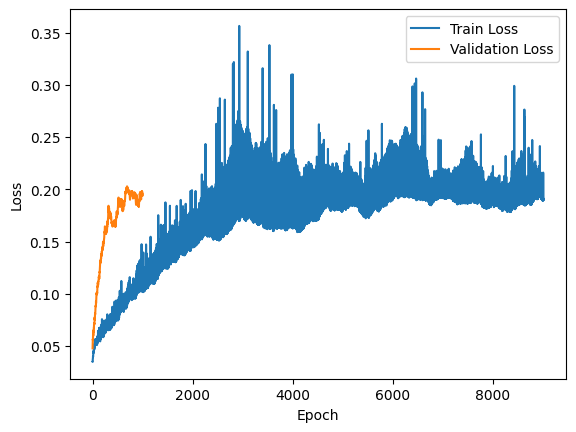

In [36]:
# Train the model
for epoch in range(num_epochs):
    model.train()
    for batch_idx, (real_features, deepfake_features) in enumerate(train_loader):
        optimizer.zero_grad()
        real_features, deepfake_features = real_features.to(
            device
        ), deepfake_features.to(device)
        output = model(real_features)
        loss = criterion(output, deepfake_features)
        model.backward(loss)
        optimizer.step()
        train_losses.append(loss.item())

        print(
            f"Epoch [{epoch+1}/{num_epochs}], Batch [{batch_idx+1}/{len(train_loader)}], Train Loss: {loss.item():.4f}"
        )

    # Validation
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for batch_idx, (real_features, deepfake_features) in enumerate(val_loader):
            real_features, deepfake_features = real_features.to(
                device
            ), deepfake_features.to(device)
            output = model(real_features)
            loss = criterion(output, deepfake_features)
            val_loss += loss.item()

            # Visualize some outputs
            # if batch_idx == 0:  # Only visualize for the first batch of each epoch
            # visualize_output(real_features, output, deepfake_features)  # Implement visualize_output function

        val_losses.append(val_loss / len(val_loader))
        print(f"Epoch [{epoch+1}/{num_epochs}], Validation Loss: {val_losses[-1]:.4f}")

# Plot losses
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
# Train the model
for epoch in range(num_epochs):
    model.train()

    for batch_idx, (real_features, deepfake_features) in enumerate(train_loader):
        optimizer.zero_grad()
        # Move data to GPU
        real_features, deepfake_features = real_features.to(
            device
        ), deepfake_features.to(device)
        # Forward pass
        output = model(real_features)
        # Compute loss
        loss = criterion(output, deepfake_features)
        # Backward pass
        model.backward(loss)
        # Add noise to gradients for differential privacy using DP-SGD
        # privacy_engine.clip_and_add_noise(model.parameters())
        # Update weights
        optimizer.step()
        print(
            f"Epoch [{epoch+1}/{num_epochs}], Batch [{batch_idx+1}/{len(train_loader)}],Trainiing Loss: {loss.item():.4f}"
        )

        # Append training loss
        train_losses.append(loss.item())

# Validate the model
model.eval()
val_loss = 0.0
with torch.no_grad():
    for batch_idx, (real_features, deepfake_features) in enumerate(val_loader):
        # Move data to GPU
        real_features, deepfake_features = real_features.to(
            device
        ), deepfake_features.to(device)
        output = model(real_features)
        # Store generated features
        generated_features.append(
            output.detach().cpu().numpy()
        )  # Convert to numpy array if needed
        val_loss += criterion(output, deepfake_features).item()
    val_loss /= len(val_loader)
    # Append validation loss
    val_losses.append(val_loss)
print(
    f"Epoch [{epoch+1}/{num_epochs}], Batch [{batch_idx+1}/{len(train_loader)}],Validation Loss: {val_loss:.4f}"
)

Streaming output truncated to the last 5000 lines.
Epoch [445/1000], Batch [6/9],Trainiing Loss: 0.0349
Epoch [445/1000], Batch [7/9],Trainiing Loss: 0.0349
Epoch [445/1000], Batch [8/9],Trainiing Loss: 0.0360
Epoch [445/1000], Batch [9/9],Trainiing Loss: 0.0341
Epoch [446/1000], Batch [1/9],Trainiing Loss: 0.0354
Epoch [446/1000], Batch [2/9],Trainiing Loss: 0.0348
Epoch [446/1000], Batch [3/9],Trainiing Loss: 0.0358
Epoch [446/1000], Batch [4/9],Trainiing Loss: 0.0356
Epoch [446/1000], Batch [5/9],Trainiing Loss: 0.0345
Epoch [446/1000], Batch [6/9],Trainiing Loss: 0.0350
Epoch [446/1000], Batch [7/9],Trainiing Loss: 0.0365
Epoch [446/1000], Batch [8/9],Trainiing Loss: 0.0356
Epoch [446/1000], Batch [9/9],Trainiing Loss: 0.0347
Epoch [447/1000], Batch [1/9],Trainiing Loss: 0.0361
Epoch [447/1000], Batch [2/9],Trainiing Loss: 0.0349
Epoch [447/1000], Batch [3/9],Trainiing Loss: 0.0341
Epoch [447/1000], Batch [4/9],Trainiing Loss: 0.0361
Epoch [447/1000], Batch [5/9],Trainiing Loss: 0.

In [ ]:
# Train the model
for batch_idx, (real_features, deepfake_features) in enumerate(train_loader):

    model1.train()
    # Move data to GPU
    real_features, deepfake_features = real_features.to(device), deepfake_features.to(
        device
    )

    for epoch in range(num_epochs):

        optimizer.zero_grad()

        # Forward pass
        output = model1(real_features)
        # Compute loss
        loss = criterion(output, deepfake_features)
        # Backward pass
        loss.backward()
        # Add noise to gradients for differential privacy using DP-SGD
        # privacy_engine.clip_and_add_noise(model.parameters())
        # Update weights
        optimizer.step()
        print(
            f"Epoch [{epoch+1}/{num_epochs}], Batch [{batch_idx+1}/{len(train_loader)}],Trainiing Loss: {loss.item():.4f}"
        )

        # Append training loss
        train_losses.append(loss.item())

# Validate the model
model1.eval()
val_loss = 0.0
with torch.no_grad():
    for batch_idx, (real_features, deepfake_features) in enumerate(val_loader):
        # Move data to GPU
        real_features, deepfake_features = real_features.to(
            device
        ), deepfake_features.to(device)
        output = model1(real_features)
        # Store generated features
        generated_features.append(
            output.detach().cpu().numpy()
        )  # Convert to numpy array if needed
        val_loss += criterion(output, deepfake_features).item()
    val_loss /= len(val_loader)
    # Append validation loss
    val_losses.append(val_loss)
print(
    f"Epoch [{epoch+1}/{num_epochs}], Batch [{batch_idx+1}/{len(train_loader)}],Validation Loss: {val_loss:.4f}"
)

Streaming output truncated to the last 5000 lines.
Epoch [2/1000], Batch [5/9],Trainiing Loss: 0.0373
Epoch [3/1000], Batch [5/9],Trainiing Loss: 0.0373
Epoch [4/1000], Batch [5/9],Trainiing Loss: 0.0374
Epoch [5/1000], Batch [5/9],Trainiing Loss: 0.0374
Epoch [6/1000], Batch [5/9],Trainiing Loss: 0.0374
Epoch [7/1000], Batch [5/9],Trainiing Loss: 0.0374
Epoch [8/1000], Batch [5/9],Trainiing Loss: 0.0373
Epoch [9/1000], Batch [5/9],Trainiing Loss: 0.0373
Epoch [10/1000], Batch [5/9],Trainiing Loss: 0.0373
Epoch [11/1000], Batch [5/9],Trainiing Loss: 0.0373
Epoch [12/1000], Batch [5/9],Trainiing Loss: 0.0373
Epoch [13/1000], Batch [5/9],Trainiing Loss: 0.0374
Epoch [14/1000], Batch [5/9],Trainiing Loss: 0.0373
Epoch [15/1000], Batch [5/9],Trainiing Loss: 0.0373
Epoch [16/1000], Batch [5/9],Trainiing Loss: 0.0373
Epoch [17/1000], Batch [5/9],Trainiing Loss: 0.0372
Epoch [18/1000], Batch [5/9],Trainiing Loss: 0.0374
Epoch [19/1000], Batch [5/9],Trainiing Loss: 0.0374
Epoch [20/1000], Batc

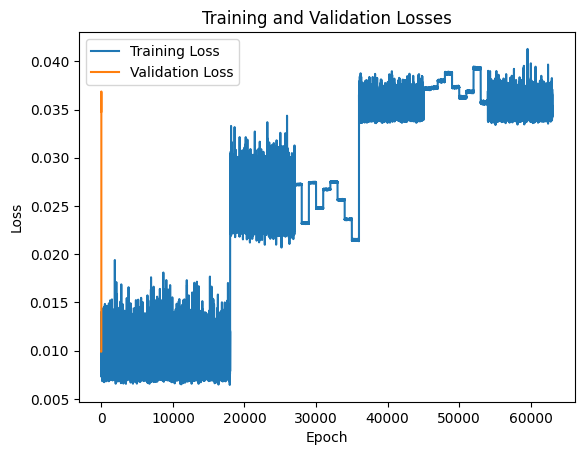

In [ ]:
# Plot training and validation losses
plt.plot(range(len(train_losses)), train_losses, label="Training Loss")
plt.plot(range(len(val_losses)), val_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Losses")
plt.legend()
plt.show()

In [ ]:
# Plot training and validation accuracies
plt.plot(range(len(train_accuracies)), train_accuracies, label="Training Accuracy")
plt.plot(range(len(val_accuracies)), val_accuracies, label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("Training and Validation Accuracies")
plt.legend()
plt.show()

NameError: name 'train_accuracies' is not defined

In [ ]:
len(generated_features)

21

In [ ]:
generated_features

[array([[[-0.1050486 ,  0.0592591 , -0.04588313, ...,  0.0681432 ,
           0.05616908, -0.07822345],
         [-0.09180458,  0.10368504, -0.02269186, ...,  0.080788  ,
           0.09603249, -0.21644062],
         [-0.10137026,  0.10495242, -0.0299967 , ...,  0.05484535,
           0.10793833, -0.20948854],
         ...,
         [-0.01912401,  0.0277293 , -0.000632  , ...,  0.00333114,
           0.02780168,  0.05257608],
         [-0.01912401,  0.0277293 , -0.000632  , ...,  0.00333114,
           0.02780168,  0.05257608],
         [-0.01912401,  0.0277293 , -0.000632  , ...,  0.00333114,
           0.02780168,  0.05257608]],
 
        [[-0.10067847,  0.06771937, -0.04842731, ...,  0.06707394,
           0.06730863, -0.09654537],
         [-0.09655349,  0.09838504, -0.02307442, ...,  0.08135854,
           0.08672763, -0.19937101],
         [-0.10654895,  0.09703689, -0.01857823, ...,  0.06867893,
           0.08792984, -0.19429311],
         ...,
         [-0.01912401,  0.0277293

In [ ]:
def adjust_learning_rate(optimizer, epoch, initial_lr, lr_decay_epoch):
    """Adjusts the learning rate of the optimizer."""
    lr = initial_lr * (0.1 ** (epoch // lr_decay_epoch))
    for param_group in optimizer.param_groups:
        param_group["lr"] = lr


def train_model(
    model,
    train_loader,
    val_loader,
    num_epochs,
    initial_lr=0.001,
    lr_decay_epoch=3,
    device="cuda",
):
    model.train()
    optimizer = optim.Adam(model.parameters(), lr=initial_lr)
    criterion = nn.MSELoss()
    scheduler = StepLR(optimizer, step_size=lr_decay_epoch, gamma=0.1)

    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        adjust_learning_rate(optimizer, epoch, initial_lr, lr_decay_epoch)
        for batch_idx, (real_features, deepfake_features) in enumerate(train_loader):
            real_features, deepfake_features = real_features.to(
                device
            ), deepfake_features.to(device)
            optimizer.zero_grad()
            output = model(real_features)
            loss = criterion(output, deepfake_features)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            print(
                f"Epoch [{epoch+1}/{num_epochs}], Batch [{batch_idx+1}/{len(train_loader)}], Train Loss: {loss.item():.4f}"
            )

        train_losses.append(running_loss / len(train_loader))

        # Validation
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for batch_idx, (real_features, deepfake_features) in enumerate(val_loader):
                real_features, deepfake_features = real_features.to(
                    device
                ), deepfake_features.to(device)
                output = model(real_features)
                val_loss += criterion(output, deepfake_features).item()

        val_loss /= len(val_loader)
        val_losses.append(val_loss)
        print(f"Epoch [{epoch+1}/{num_epochs}], Validation Loss: {val_loss:.4f}")

    return train_losses, val_losses


def evaluate_model(model, loader, device="cuda"):
    model.eval()
    criterion = nn.MSELoss()
    total_loss = 0.0
    with torch.no_grad():
        for real_features, deepfake_features in loader:
            real_features, deepfake_features = real_features.to(
                device
            ), deepfake_features.to(device)
            output = model(real_features)
            total_loss += criterion(output, deepfake_features).item()

    avg_loss = total_loss / len(loader)
    return avg_loss

In [ ]:
train_model(model, train_loader, val_loader, 1000)
evaluate_model(model, val_loader)

#Emotion Recognition


In [ ]:
!unzip /content/drive/MyDrive/session1.zip
!unzip /content/drive/MyDrive/session1_video.zip

Archive:  /content/drive/MyDrive/session1.zip
   creating: session1/
   creating: session1/S01A/
   creating: session1/S01A/P/
  inflating: session1/S01A/P/MSP-IMPROV-S01A-F01-P-FM01.wav  
  inflating: session1/S01A/P/MSP-IMPROV-S01A-F01-P-FM02.wav  
  inflating: session1/S01A/P/MSP-IMPROV-S01A-F01-P-MF01.wav  
  inflating: session1/S01A/P/MSP-IMPROV-S01A-M01-P-FM01.wav  
  inflating: session1/S01A/P/MSP-IMPROV-S01A-M01-P-FM02.wav  
  inflating: session1/S01A/P/MSP-IMPROV-S01A-M01-P-MF01.wav  
  inflating: session1/S01A/P/MSP-IMPROV-S01A-M01-P-MF02.wav  
  inflating: session1/S01A/P/MSP-IMPROV-S01A-M01-P-MF03.wav  
   creating: session1/S01A/R/
  inflating: session1/S01A/R/MSP-IMPROV-S01A-M01-R-MM01.wav  
   creating: session1/S01A/S/
  inflating: session1/S01A/S/MSP-IMPROV-S01A-F01-S-FM01.wav  
  inflating: session1/S01A/S/MSP-IMPROV-S01A-F01-S-FM02.wav  
  inflating: session1/S01A/S/MSP-IMPROV-S01A-F01-S-FM03.wav  
  inflating: session1/S01A/S/MSP-IMPROV-S01A-F01-S-FM04.wav  
  infla

In [ ]:
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"
torch.cuda.empty_cache()

In [ ]:
final_features = []

In [ ]:
video_path = "session1/S01H/P/MSP-IMPROV-S01H-F01-P-MF01.avi"
audio_path = "session1/S01H/P/MSP-IMPROV-S01H-F01-P-MF01.wav"

In [ ]:
import cv2



def resize_video(video_path, output_path, scale=0.5):

    # Open the video

    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():

        print("Error opening video file")
        return


    # Get video properties

    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH) * scale)

    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT) * scale)

    fps = cap.get(cv2.CAP_PROP_FPS)

    fourcc = cv2.VideoWriter_fourcc(
        *"mp4v"
    )  # You can change this to match your video codec


    # Create a VideoWriter object to write the video with new dimensions

    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))


    while True:

        ret, frame = cap.read()

        if not ret:

            break

        resized_frame = cv2.resize(frame, (width, height))

        out.write(resized_frame)


    cap.release()

    out.release()



# Call the resize function

resized_video_path = "resized_video.avi"

resize_video(video_path, resized_video_path)

In [ ]:
layer_features, feature = extract_visual_feature(
    resized_video_path, audio_path, ckpt_path, user_dir
)

Load video resized_video.avi: shape (594, 540, 720)
Load audio session1/S01A/P/MSP-IMPROV-S01A-F01-P-MF01.wav: shape (496, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 594, 540, 720])
Load audio session1/S01A/P/MSP-IMPROV-S01A-F01-P-MF01.wav: shape torch.Size([1, 104, 594])
Checkpoint: fine-tuned


OutOfMemoryError: CUDA out of memory. Tried to allocate 13.77 GiB. GPU 0 has a total capacity of 14.75 GiB of which 11.25 GiB is free. Process 10409 has 3.49 GiB memory in use. Of the allocated memory 1.27 GiB is allocated by PyTorch, and 2.07 GiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [ ]:
final_features.append(feature)

In [ ]:
labels = [0, 1, 0, 1]

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader


class EmotionAVDataset(Dataset):
    def __init__(self, features, labels):
        """
        Args:
            features (list of Tensors): List where each element is a tensor of shape [sequence_length, feature_dim]
            labels (list of int): List of labels corresponding to each feature set
        """
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

In [ ]:
from torch.nn.utils.rnn import pad_sequence


def collate_fn(batch):
    # Separate features and labels
    features, labels = zip(*batch)
    # Pad features
    features_padded = pad_sequence(features, batch_first=True, padding_value=0)
    labels = torch.tensor(labels)
    return features_padded, labels


# Example usage
dataset = EmotionAVDataset(final_features, labels)
loader = DataLoader(dataset, batch_size=10, collate_fn=collate_fn, shuffle=True)

In [ ]:
import torch.nn as nn



class EmotionClassifier(nn.Module):

    def __init__(self, feature_dim, hidden_dim, num_classes):

        super().__init__()

        self.lstm = nn.LSTM(feature_dim, hidden_dim, batch_first=True)

        self.classifier = nn.Linear(hidden_dim, num_classes)


    def forward(self, x):

        _, (hidden, _) = self.lstm(x)

        out = self.classifier(hidden[-1])
        return out

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim


# Define a simple LSTM-based model for emotion classification
class EmotionClassifier(nn.Module):
    def __init__(self, feature_dim, hidden_dim, num_classes):
        super(EmotionClassifier, self).__init__()
        self.lstm = nn.LSTM(feature_dim, hidden_dim, batch_first=True)
        self.classifier = nn.Linear(hidden_dim, num_classes)

    def forward(self, x):
        _, (hidden, _) = self.lstm(x)
        out = self.classifier(hidden[-1])  # Use the last hidden state
        return out


# Assume num_features and num_classes are defined based on your dataset
feature_dim = 768  # Feature dimension for each timestep
hidden_dim = 128  # Hidden dimension for LSTM
num_classes = 2  # Example: 5 different emotion classes

model = EmotionClassifier(feature_dim, hidden_dim, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.1)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
model = EmotionClassifier(feature_dim, hidden_dim, num_classes).to(device)

In [ ]:
import torch



def adjust_learning_rate(optimizer, epoch, initial_lr=0.001, lr_decay_epoch=3):

    """Sets the learning rate to the initial LR decayed by 10 every lr_decay_epoch epochs"""

    lr = initial_lr * (0.1 ** (epoch // lr_decay_epoch))

    for param_group in optimizer.param_groups:

        param_group["lr"] = lr



def train_model(num_epochs, initial_lr=0.001, lr_decay_epoch=3):
    model.train()

    optimizer = optim.Adam(model.parameters(), lr=initial_lr)

    for epoch in range(num_epochs):

        running_loss = 0.0

        adjust_learning_rate(optimizer, epoch, initial_lr, lr_decay_epoch)

        for features, labels in loader:

            features, labels = features.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(features)

            loss = criterion(outputs, labels)

            loss.backward()

            optimizer.step()

            running_loss += loss.item()


        # Optional: Print average gradients per epoch to check for vanishing/exploding gradients

        avg_gradients = {
            name: torch.mean(param.grad.abs()).item()
            for name, param in model.named_parameters()
            if param.grad is not None
        }

        print(
            f"Epoch {epoch+1}, Loss: {running_loss / len(loader)}, Avg Gradients: {avg_gradients}"
        )


        # Check for NaN loss

        if torch.isnan(loss).any():

            print("NaN loss detected")

            break



def evaluate_model():

    model.eval()

    total_correct = 0

    total_samples = 0

    with torch.no_grad():

        for features, labels in loader:

            features, labels = features.to(device), labels.to(device)
            outputs = model(features)

            _, predicted = torch.max(outputs, 1)

            total_correct += (predicted == labels).sum().item()

            total_samples += labels.size(0)

    accuracy = total_correct / total_samples

    print(f"Accuracy: {accuracy:.2f}")

In [ ]:
train_model(50)
evaluate_model()

Epoch 1, Loss: 0.7050982117652893, Avg Gradients: {'lstm.weight_ih_l0': 0.00015319950762204826, 'lstm.weight_hh_l0': 0.0001138313818955794, 'lstm.bias_ih_l0': 0.00045707906247116625, 'lstm.bias_hh_l0': 0.00045707906247116625, 'classifier.weight': 0.010660267435014248, 'classifier.bias': 0.004405215382575989}
Epoch 2, Loss: 0.6446354389190674, Avg Gradients: {'lstm.weight_ih_l0': 0.00011407291458453983, 'lstm.weight_hh_l0': 9.138100722339004e-05, 'lstm.bias_ih_l0': 0.0005290161934681237, 'lstm.bias_hh_l0': 0.0005290161934681237, 'classifier.weight': 0.010138976387679577, 'classifier.bias': 0.028205230832099915}
Epoch 3, Loss: 0.6003038883209229, Avg Gradients: {'lstm.weight_ih_l0': 8.434417395619676e-05, 'lstm.weight_hh_l0': 8.907501614885405e-05, 'lstm.bias_ih_l0': 0.0007479123887605965, 'lstm.bias_hh_l0': 0.0007479123887605965, 'classifier.weight': 0.010165289044380188, 'classifier.bias': 0.055923957377672195}
Epoch 4, Loss: 0.5680534839630127, Avg Gradients: {'lstm.weight_ih_l0': 5.7

### Privacy Transformer Model


In [ ]:
import torch
import torch.nn.functional as F
import tensorflow as tf
import keras
from keras import layers
import numpy as np
import os


print("done")

In [ ]:
input_hubert = torch.randn(117, 768).cpu().numpy()
input_speaker = torch.randn(1, 32).cpu().numpy()
input_layers = torch.randn(12, 1, 117, 768).cpu().numpy()
z_target = torch.randn(117, 768).cpu().numpy()

input_hubert = input_hubert.flatten()
z_tgt = z_target.flatten()
input_layers = tf.reshape(input_layers, (12, -1))

print(f"{input_hubert.shape=}\n{input_layers.shape=}\n{input_speaker.shape=}")

# z_tgt = z_target
z_tgt.shape

In [ ]:
class PrivacyTransformerEncoder(layers.Layer):
    def __init__(
        self, d_model, num_heads, num_layers, ff_dim, dropout_rate=0.1, name="default"
    ):
        super().__init__()
        self._name = name
        self.num_layers = num_layers  # number of encoder blocks
        self.mha = [
            layers.MultiHeadAttention(num_heads=num_heads, key_dim=d_model)
            for _ in range(num_layers)
        ]  # attention blocks
        self.encoders = [
            self.create_encoder(d_model, num_heads, ff_dim, dropout_rate)
            for _ in range(num_layers)
        ]  # encoder blocks

    def create_encoder(self, d_model, num_heads, ff_dim, dropout_rate):
        return tf.keras.Sequential(
            [
                layers.Dropout(dropout_rate),
                layers.LayerNormalization(epsilon=1e-6),
                layers.Dense(ff_dim, activation="relu"),
                layers.Dropout(dropout_rate),
                layers.Dense(d_model),
                layers.Dropout(dropout_rate),
                layers.LayerNormalization(epsilon=1e-6),
            ]
        )

    def call(self, inputs, training=None):
        x = inputs
        for block in range(self.num_layers):
            x = self.mha[block](query=x, value=x)
            x = self.encoders[block](x, training=training)
        return x

In [ ]:
class PrivacyTransformer(keras.Model):
    def __init__(
        self, d, d_model, d_spk, d_L, num_heads, num_layers, ff_dim, dropout_rate=0.1
    ):
        super().__init__()
        # self.P_spk_emb = layers.Embedding(input_dim=num_speakers, output_dim=d_spk, name='SpeakerEmbeddings')
        self.P_spk_emb = layers.Dense(
            input_shape=(32,), units=d_spk, activation="relu", name="SpeakerEmbeddings"
        )
        self.P_layer_emb = layers.Dense(
            input_shape=(d,), units=d_L, activation="relu", name="LayerEmbeddings"
        )
        self.P_fc1 = layers.Dense(128, name="FullyConnected1")
        self.P_fc2 = layers.Dense(64, name="FullyConnected2")
        self.P_te = PrivacyTransformerEncoder(
            32, num_heads, num_layers, ff_dim, dropout_rate, name="TransformerEncoder"
        )
        self.P_fc3 = layers.Dense(d, name="FullyConnected3")

    def call(self, inputs, training=None):
        hubert_embeddings, speakers, layers = inputs
        spk_embeddings = self.P_spk_emb(speakers)
        spk_embeddings = tf.reshape(spk_embeddings, -1)
        layer_embeddings = self.P_layer_emb(layers)
        # print(f'{hubert_embeddings.shape=}\n{spk_embeddings.shape=}\n{layer_embeddings.shape=}')
        # Expand dimensions of hubert_embeddings and spk_embeddings to match the shape of layer_embeddings
        expanded_hubert_embeddings = tf.expand_dims(
            hubert_embeddings, axis=0
        )  # Shape: [1, 91392]
        expanded_spk_embeddings = tf.expand_dims(
            spk_embeddings, axis=-1
        )  # Shape: [12, 1]

        # Tile the expanded tensors to match the shape of layer_embeddings
        tiled_hubert_embeddings = tf.tile(
            expanded_hubert_embeddings, multiples=[12, 1]
        )  # Shape: [12, 91392]
        tiled_spk_embeddings = tf.tile(
            expanded_spk_embeddings, multiples=[1, 32]
        )  # Shape: [12, 32]

        # Concatenate all three tensors along the appropriate axis
        final_tensor = tf.concat(
            [tiled_spk_embeddings, layer_embeddings, tiled_hubert_embeddings], axis=1
        )

        # Check the shape of the final tensor
        # print("Shape of the final tensor:", final_tensor.shape)
        x = self.P_fc1(final_tensor)
        x = self.P_fc2(x)
        x = tf.expand_dims(x, axis=0)
        # print("Shape of the te input:", x.shape)
        x = self.P_te(x, training=training)
        # print(f'shape of te output', x.shape)
        x = tf.reshape(x, [1, -1])
        # print(f'last input:' ,x.shape)
        outputs = self.P_fc3(x)
        outputs = tf.reshape(outputs, [-1])
        return outputs

In [ ]:
# Padding or slicing for input_hubert
if input_hubert.size(0) < new_x:  # If old_x is smaller than new_x, pad the tensor
    pad_size = (0,0,0, new_x - input_hubert.size(0))  # Pad along the first dimension
    input_hubert = F.pad(input_hubert, pad_size)
else:  # If old_x is larger than new_x, slice the tensor
    input_hubert = input_hubert[:new_x, :]

# Padding or slicing for input_layers
for i,l in enumerate(input_layers):
if l.size(1) < new_x:  # If old_x is smaller than new_x, pad the tensor
    pad_size = (0, 0, 0, new_x - l.size(1),0,0)  # Pad along the second dimension
    input_layers[i] = F.pad(l, pad_size)
else:  # If old_x is larger than new_x, slice the tensor
    input_layers[i] = l[:, :new_x, :]

# Padding or slicing for z_tgt
if z_tgt.size(0) < new_x:  # If old_x is smaller than new_x, pad the tensor
    pad_size = (0,0,0, new_x - z_tgt.size(0))  # Pad along the first dimension
    z_tgt = F.pad(z_tgt, pad_size)
else:  # If old_x is larger than new_x, slice the tensor
    z_tgt = z_tgt[:new_x, :]

seed = 0 if speaker=='fadg0' else 1
tf.random.set_seed(seed)
input_speaker = tf.random.normal(shape=(1,32))

input_hubert = input_hubert.cpu().flatten().numpy()
z_tgt = z_tgt.cpu().flatten().numpy()
input_layers = torch.cat(input_layers, dim=0).cpu().numpy()
input_layers = tf.reshape(input_layers,(12,-1))

In [ ]:
# Example instantiation
num_speakers = 4  # Number of target speakers
d_spk = 12  # Dimension of speaker embeddings
d_L = 32  # Dimension of layer embeddings
d = 117 * 768
d_model = d + d_spk + d_L  # Embedding dimension (d + d_spk + d_L)
num_heads = 4  # Number of attention heads
num_layers = 2  # Number of Transformer encoder layers
ff_dim = 2048  # Dimension of feed-forward network

privacy_transformer = PrivacyTransformer(
    d=d,
    d_model=d_model,
    d_spk=d_spk,
    d_L=d_L,
    num_heads=num_heads,
    num_layers=num_layers,
    ff_dim=ff_dim,
    dropout_rate=0.1,
)


print(f"{input_hubert.shape=}\n{input_speaker.shape=}\n{input_layers.shape=}\n\n")
x_train = (input_hubert, input_speaker, input_layers)

output = privacy_transformer(x_train, training=False)
print(f"{output.shape=}")
# Print the model summary
privacy_transformer.summary()

In [ ]:
# Example instantiation
num_speakers = 4  # Number of target speakers
d_spk = 12  # Dimension of speaker embeddings
d_L = 32  # Dimension of layer embeddings
d = 117 * 768
d_model = d + d_spk + d_L  # Embedding dimension (d + d_spk + d_L)
num_heads = 4  # Number of attention heads
num_layers = 2  # Number of Transformer encoder layers
ff_dim = 2048  # Dimension of feed-forward network

privacy_transformer = PrivacyTransformer(
    d=d,
    d_model=d_model,
    d_spk=d_spk,
    d_L=d_L,
    num_heads=num_heads,
    num_layers=num_layers,
    ff_dim=ff_dim,
    dropout_rate=0.1,
)

x_train = (input_hubert, input_speaker, input_layers)
output = privacy_transformer(x_train, training=False)
privacy_transformer.load_weights(os.path.join(weights_path, f"pt_104.0.h5"))
print("weights loaded")
output = privacy_transformer(x_train, training=False)